In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [3]:
#path
path = r'/Users/april/Machine Learning/Datasets'

In [4]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'scaled_dataset.csv'))
climate

DATE     MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
0      19600101 -1.599964           0.660514          -0.02793   
1      19600102 -1.599964           0.244897          -0.02793   
2      19600103 -1.599964           1.076130          -0.02793   
3      19600104 -1.599964          -1.001953          -0.02793   
4      19600105 -1.599964           0.244897          -0.02793   
...         ...       ...                ...               ...   
22945  20221027  1.013583          -1.833187          -0.02793   
22946  20221028  1.013583           0.244897          -0.02793   
22947  20221029  1.013583          -0.586336          -0.02793   
22948  20221030  1.013583          -0.170720          -0.02793   
22949  20221031  1.013583          -0.170720          -0.02793   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0            0.826097       -0.001949               -1.101066   
1            0.735760       -0.001949               -1.058108   
2            1.277781       -0.001949               -1.251420   
3            1.458455       -0.001949               -0.821838   
4            1.729466       -0.001949               -0.746661   
...               ...             ...                     ...   
22945        0.284075        1.037367               -0.005632   
22946        0.103401        0.976231               -0.005632   
22947        0.013064        0.716402               -0.005632   
22948        0.374412        0.487141               -0.005632   
22949        0.735760        0.196744               -0.005632   

       BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  ...  \
0                -0.265148         -0.179228       -0.902918  ...   
1                 1.658760         -0.179228       -0.810126  ...   
2                 0.155707         -0.179228       -1.065304  ...   
3                -0.445514         -0.179228       -0.114186  ...   
4                -0.164944         -0.179228        0.187388  ...   
...                    ...               ...             ...  ...   
22945            -0.004619         -0.179228        0.720943  ...   
22946            -0.004619         -0.179228        0.187388  ...   
22947            -0.004619         -0.179228        0.349774  ...   
22948            -0.004619         -0.179228        0.280180  ...   
22949            -0.004619         -0.179228       -0.322968  ...   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                 -0.443701           0.761754          -1.299744   
1                  0.783085           1.183580          -1.262455   
2                  0.783085           1.183580          -0.432779   
3                  0.783085           0.480538           0.387574   
4                 -1.670486          -0.363113           1.729970   
...                     ...                ...                ...   
22945             -0.443701          -0.081896          -0.003958   
22946             -0.443701          -0.081896          -0.003958   
22947             -0.443701          -0.081896          -0.003958   
22948             -0.443701          -0.081896          -0.003958   
22949             -0.443701          -0.081896          -0.003958   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
0                      -0.806427               -0.088407            -0.024706   
1                      -1.042055                0.503361            -0.024706   
2                      -1.136306               -0.396127            -0.024706   
3                      -1.183432                0.669056            -0.024706   
4                      -0.794645               -0.490810            -0.024706   
...                          ...                     ...                  ...   
22945                  -0.005290               -0.005560            -0.024706   
22946                  -0.005290               -0.005560            -0.024706   
22947                  -0.005290               -0.

In [5]:
#Read in the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Supervised','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasantweather

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [6]:
#Reduce to just the temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [7]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [8]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [9]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


[Text(0.33520208100854015, 0.9838709677419355, 'x[14] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.07039938445570308, 0.9516129032258065, 'x[29] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.20280073273212162, 0.967741935483871, 'True  '),
 Text(0.019768993509787593, 0.9193548387096774, 'x[5] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.

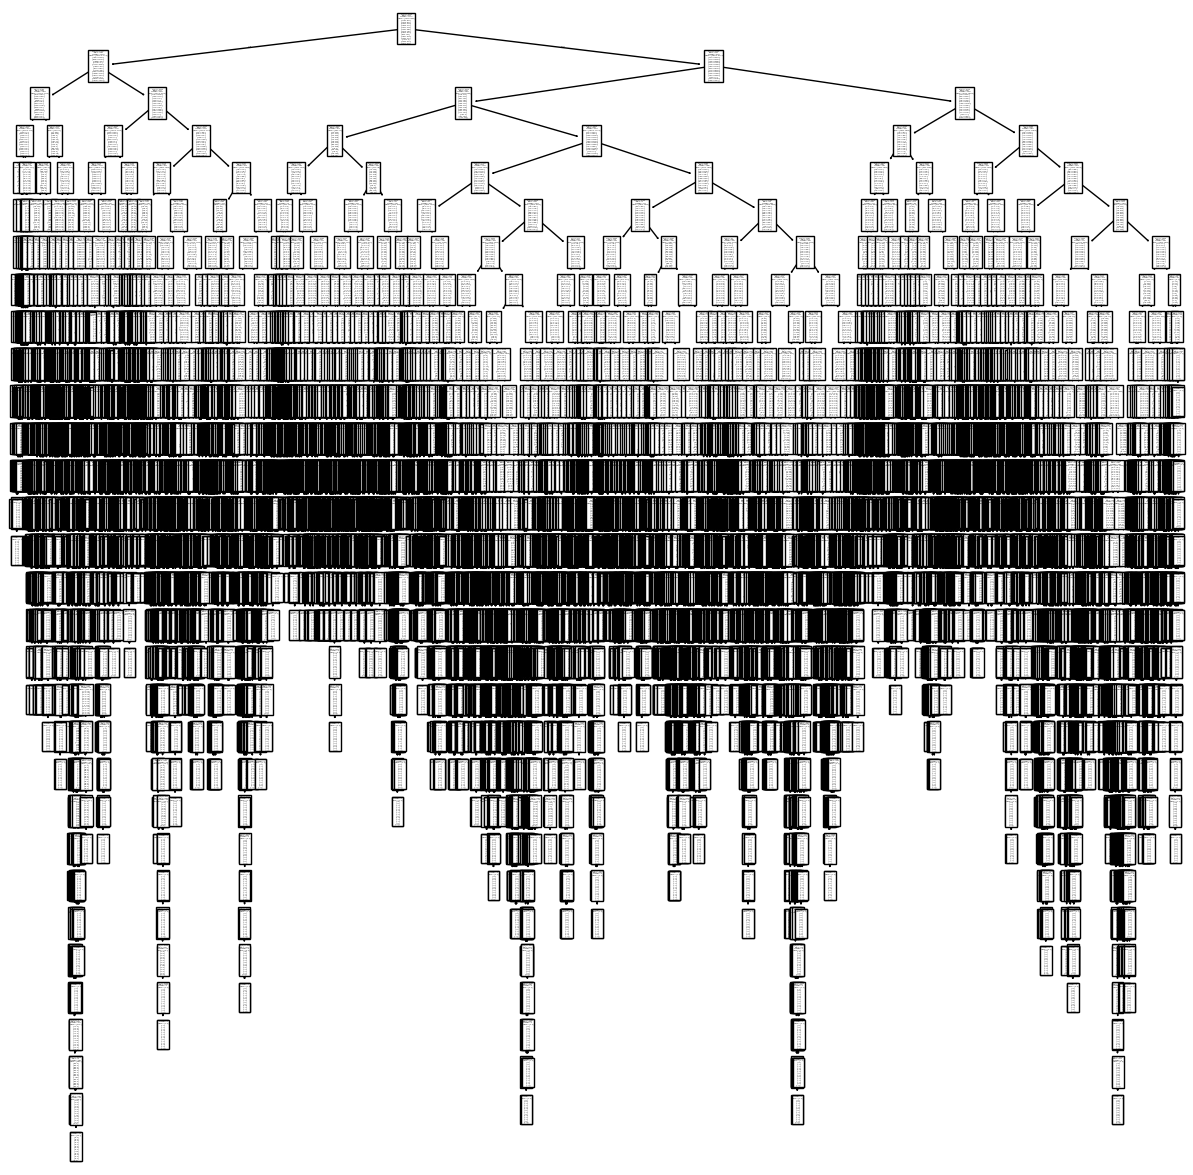

In [14]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

In [13]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.46177080327841596


C:\Users\april\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


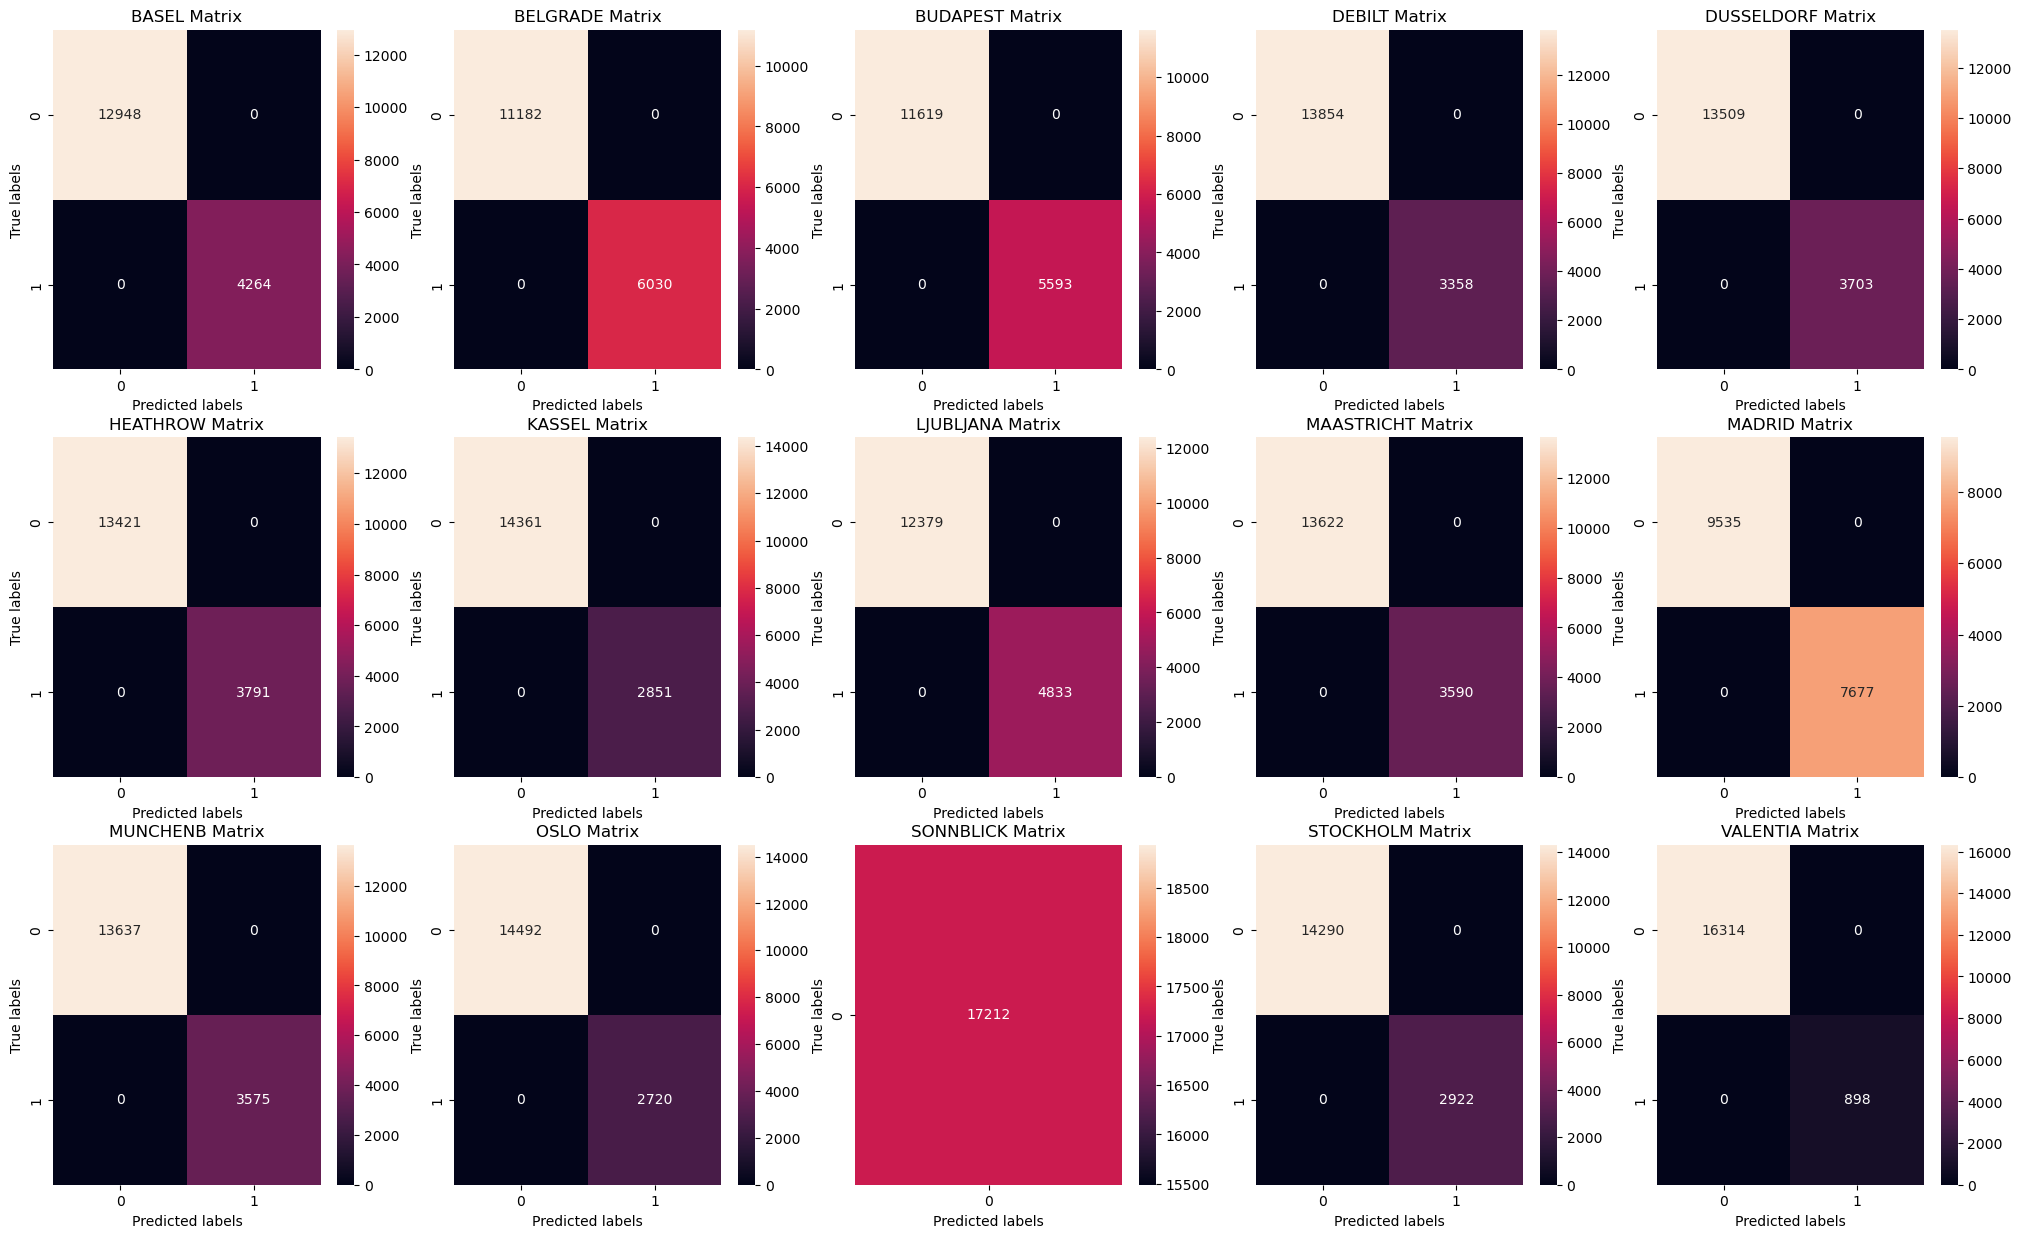

In [15]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [16]:
y_test_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_test_pred))
multilabel_confusion_matrix(y_test, y_test_pred)

Test accuracy score:  0.4724642732659463


array([[[3868,  470],
        [ 458,  942]],

       [[3168,  608],
        [ 532, 1430]],

       [[3376,  524],
        [ 499, 1339]],

       [[4288,  349],
        [ 361,  740]],

       [[4105,  402],
        [ 403,  828]],

       [[4103,  467],
        [ 437,  731]],

       [[4485,  330],
        [ 324,  599]],

       [[3679,  516],
        [ 452, 1091]],

       [[4175,  387],
        [ 374,  802]],

       [[2804,  364],
        [ 406, 2164]],

       [[4154,  392],
        [ 377,  815]],

       [[4554,  325],
        [ 316,  543]],

       [[5738,    0],
        [   0,    0]],

       [[4432,  334],
        [ 390,  582]],

       [[5297,  165],
        [ 163,  113]]], dtype=int64)

C:\Users\april\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


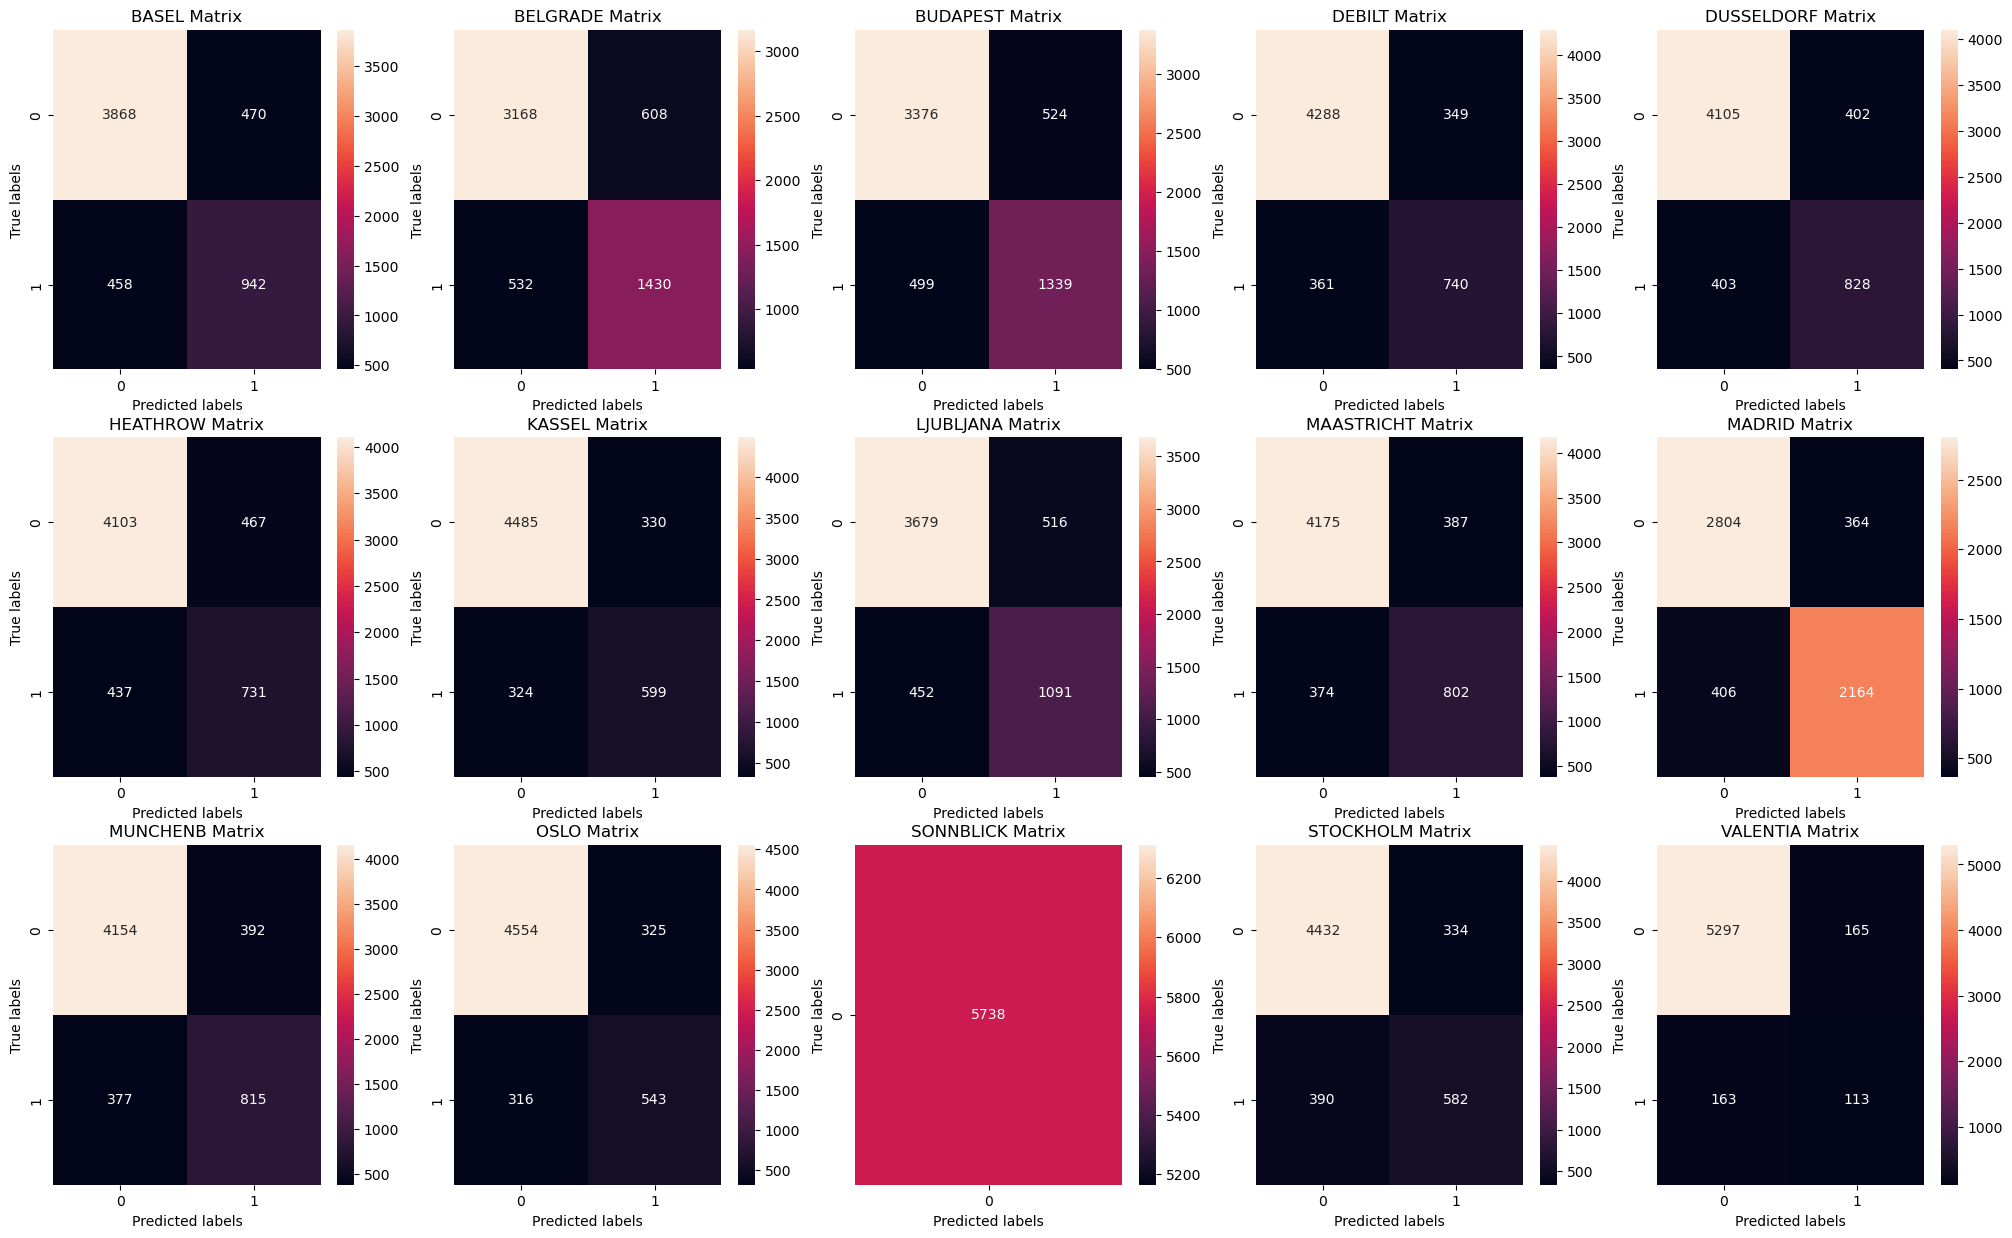

In [18]:
#Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_test_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1